# AITT Assignment
## Group 4: Gin & Ethan
### Problem Statement: How can we accurately predict the severity of a cybersecurity vulnerability by analysing its complexity, attack vector, and product using data analysis and machine learning

In [2]:
# Import the necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Create Dataframes based on all 3 of the datasets
df1 = pd.read_csv("vulnerabilities-dataset-1.csv")
df2 = pd.read_csv("vulnerabilities-dataset-2.csv")
df3 = pd.read_csv("vulnerabilities-dataset-3.csv")

##### Now that we have read the three CSVs, we will merge them into one dataframe.

In [4]:
merged_df = pd.concat([df1, df2, df3], ignore_index=True)


In [5]:
merged_df


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,CVE-2021-30983,apple,iOS and iPadOS,Apple iOS and iPadOS Buffer Overflow Vulnerabi...,2022-06-27,Apple iOS and iPadOS contain a buffer overflow...,Apply updates per vendor instructions.,2022-07-18,NaN,40,2021-08-24,7.8,CWE-120,LOCAL,LOW,HIGH
2346,CVE-2020-3837,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, macOS, tvOS, and watchOS co...",Apply updates per vendor instructions.,2022-07-18,NaN,40,2020-02-27,7.8,CWE-787,LOCAL,LOW,HIGH
2347,CVE-2020-9907,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, and tvOS contain a memory c...",Apply updates per vendor instructions.,2022-07-18,NaN,40,2020-10-16,7.8,CWE-787,LOCAL,LOW,HIGH
2348,CVE-2019-8605,apple,Multiple Products,Apple Multiple Products Use-After-Free Vulnera...,2022-06-27,"A use-after-free vulnerability in Apple iOS, m...",Apply updates per vendor instructions.,2022-07-18,NaN,40,2019-12-18,7.8,CWE-416,LOCAL,LOW,HIGH


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              2350 non-null   object 
 1   vendor_project      2350 non-null   object 
 2   product             2347 non-null   object 
 3   vulnerability_name  2350 non-null   object 
 4   date_added          2350 non-null   object 
 5   short_description   2332 non-null   object 
 6   required_action     2350 non-null   object 
 7   due_date            2350 non-null   object 
 8   notes               1 non-null      object 
 9   grp                 2350 non-null   int64  
 10  pub_date            2327 non-null   object 
 11  cvss                1862 non-null   float64
 12  cwe                 2316 non-null   object 
 13  vector              1862 non-null   object 
 14  complexity          1862 non-null   object 
 15  severity            1862 non-null   object 
dtypes: flo

In [7]:
# making a new dataframe to use so we have a failsafe
df = merged_df

In [8]:
# Remove the NaN category.
df = df.drop(columns=['notes'])

In [9]:
# Re-print the dataframe with the updates.
df

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,CVE-2021-30983,apple,iOS and iPadOS,Apple iOS and iPadOS Buffer Overflow Vulnerabi...,2022-06-27,Apple iOS and iPadOS contain a buffer overflow...,Apply updates per vendor instructions.,2022-07-18,40,2021-08-24,7.8,CWE-120,LOCAL,LOW,HIGH
2346,CVE-2020-3837,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, macOS, tvOS, and watchOS co...",Apply updates per vendor instructions.,2022-07-18,40,2020-02-27,7.8,CWE-787,LOCAL,LOW,HIGH
2347,CVE-2020-9907,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, and tvOS contain a memory c...",Apply updates per vendor instructions.,2022-07-18,40,2020-10-16,7.8,CWE-787,LOCAL,LOW,HIGH
2348,CVE-2019-8605,apple,Multiple Products,Apple Multiple Products Use-After-Free Vulnera...,2022-06-27,"A use-after-free vulnerability in Apple iOS, m...",Apply updates per vendor instructions.,2022-07-18,40,2019-12-18,7.8,CWE-416,LOCAL,LOW,HIGH


In [10]:
# Check basic information regarding the dataset.
df.describe()

,grp,cvss
count,2350.000000,1862.000000
mean,13.742553,8.410258
std,12.467945,1.304074
min,1.000000,3.100000
25%,1.000000,7.800000
50%,16.000000,8.800000
75%,20.000000,9.800000
max,41.000000,10.000000


#### From the above .describe(), we can tell that there are 2351 total rows but only 1870 of them have values for the CVSS column. We need to drop the ones without their CVSS defined so our model can effectively predict and show us relevant results.

In [11]:
#Data Cleaning
df = df.drop_duplicates()
df = df.dropna()
df = df[df["cvss"] != "NA"]
df


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,CVE-2020-3837,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, macOS, tvOS, and watchOS co...",Apply updates per vendor instructions.,2022-07-18,40,2020-02-27,7.8,CWE-787,LOCAL,LOW,HIGH
1560,CVE-2020-9907,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, iPadOS, and tvOS contain a memory c...",Apply updates per vendor instructions.,2022-07-18,40,2020-10-16,7.8,CWE-787,LOCAL,LOW,HIGH
1561,CVE-2019-8605,apple,Multiple Products,Apple Multiple Products Use-After-Free Vulnera...,2022-06-27,"A use-after-free vulnerability in Apple iOS, m...",Apply updates per vendor instructions.,2022-07-18,40,2019-12-18,7.8,CWE-416,LOCAL,LOW,HIGH
1562,CVE-2018-4344,apple,Multiple Products,Apple Multiple Products Memory Corruption Vuln...,2022-06-27,"Apple iOS, macOS, tvOS, and watchOS contain a ...",Apply updates per vendor instructions.,2022-07-18,40,2019-04-03,7.8,CWE-119,LOCAL,LOW,HIGH


In [12]:
df.describe()
# as these values now show that the count for both columns are the same, it shows that we have successfully dropped all NA values from df.

,grp,cvss
count,640.000000,640.000000
mean,11.920312,8.401563
std,12.422463,1.305075
min,1.000000,3.100000
25%,1.000000,7.800000
50%,6.000000,8.800000
75%,19.000000,9.800000
max,41.000000,10.000000


In [13]:
# To complete data cleaning, we will drop all columns which will not be used for the assignment.
df_clean = df[['product','vector','cvss','complexity']]
df_clean
#df_clean is the dataframe we will use for the next parts of the assignment.

,product,vector,cvss,complexity
0,FTA,NETWORK,9.8,LOW
1,FTA,LOCAL,7.8,LOW
2,FTA,NETWORK,9.8,LOW
3,FTA,NETWORK,9.8,LOW
4,Acrobat and Reader,NETWORK,8.8,LOW
...,...,...,...,...
1559,Multiple Products,LOCAL,7.8,LOW
1560,Multiple Products,LOCAL,7.8,LOW
1561,Multiple Products,LOCAL,7.8,LOW
1562,Multiple Products,LOCAL,7.8,LOW


In [14]:
# finding out more about the dataframe
df_clean.describe()

,cvss
count,640.000000
mean,8.401563
std,1.305075
min,3.100000
25%,7.800000
50%,8.800000
75%,9.800000
max,10.000000


In [15]:
df_clean["vector"].value_counts()
# checking how many vulnerabilities have their attack vectors as adjacent network

vector
NETWORK             468
LOCAL               162
ADJACENT_NETWORK     10
Name: count, dtype: int64

In [16]:
df_clean.dtypes
# Checking the types of the data in the new df to ensure that they are correct.

product        object
vector         object
cvss          float64
complexity     object
dtype: object

In [17]:
#Previewing the dataframe to show its columns
df_clean.head(5)

,product,vector,cvss,complexity
0,FTA,NETWORK,9.8,LOW
1,FTA,LOCAL,7.8,LOW
2,FTA,NETWORK,9.8,LOW
3,FTA,NETWORK,9.8,LOW
4,Acrobat and Reader,NETWORK,8.8,LOW


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 0 to 1563
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     640 non-null    object 
 1   vector      640 non-null    object 
 2   cvss        640 non-null    float64
 3   complexity  640 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.0+ KB


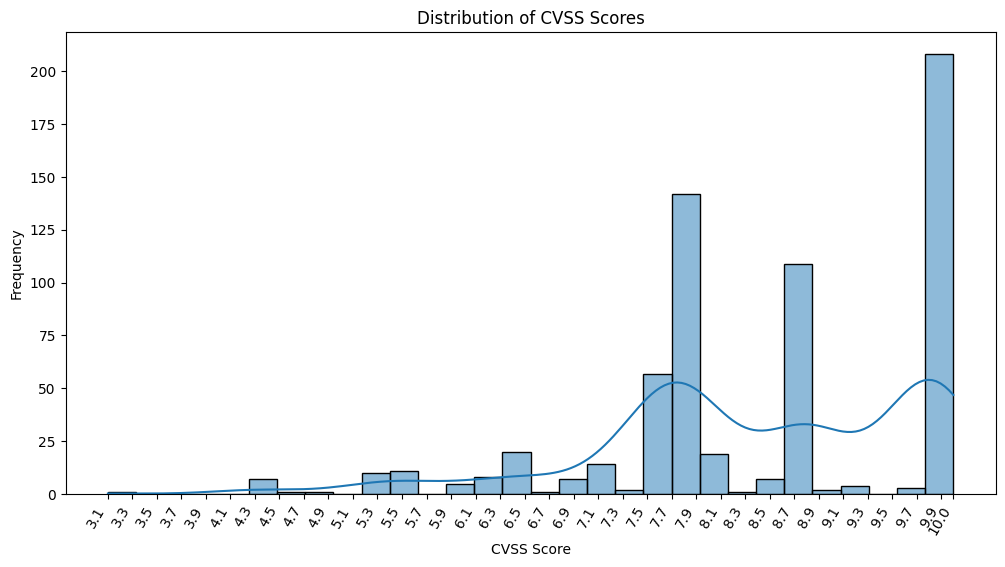

In [19]:
# Creating a plot to show the frequency of CVSS scores

# Create histogram with finer bins
plt.figure(figsize=(12, 6))
sns.histplot(df["cvss"], bins=30, kde=True)

# Set labels
plt.xlabel("CVSS Score")
plt.ylabel("Frequency")
plt.title("Distribution of CVSS Scores")

# Generate tick positions with explicit inclusion of 10.0
tick_positions = [x/10 for x in range(int(df["cvss"].min()*10.0), int(df["cvss"].max()*10.0)+1, 2)]
if 10.0 not in tick_positions:
    tick_positions.append(10.0)  # Ensure 10.0 is included

# Apply custom tick positions and rotation
plt.xticks(ticks=tick_positions, rotation=60, ha='right')

plt.show()

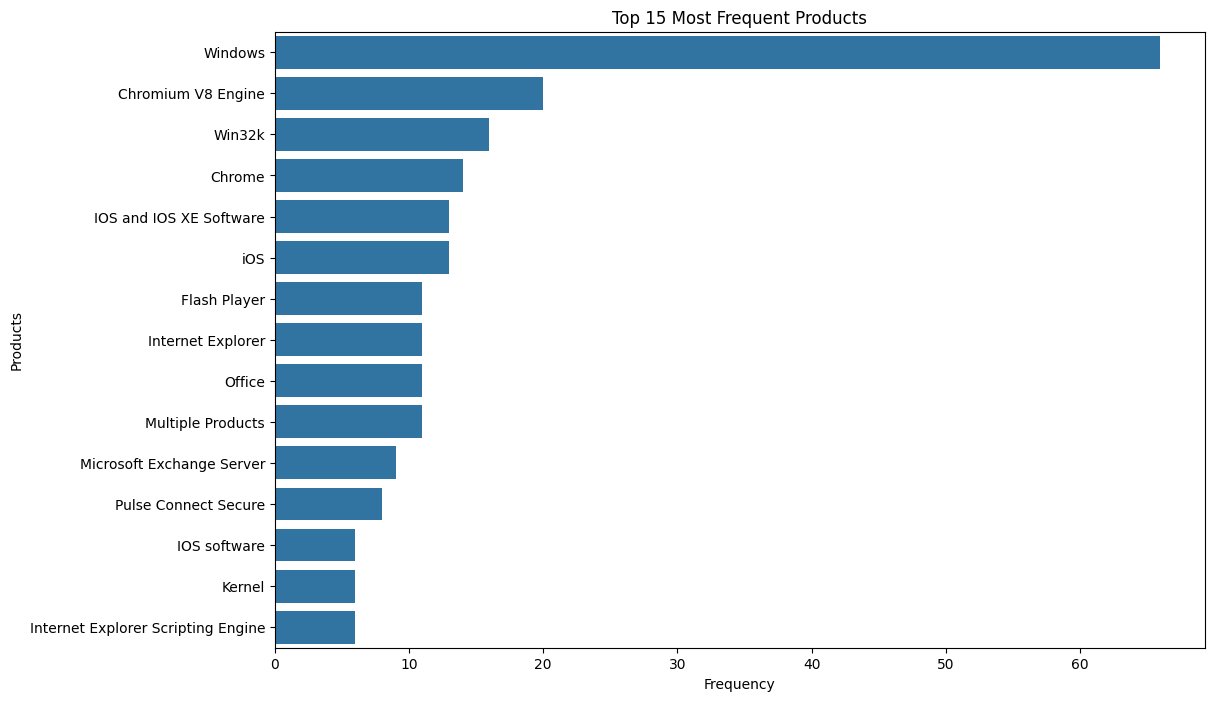

In [20]:
# Creating a plot to show the frequency of Products for the top 15 products
top_products = df["product"].value_counts().nlargest(15)
# finding the top 15 most frequent products

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index)

plt.xlabel("Frequency")
plt.ylabel("Products")
plt.title("Top 15 Most Frequent Products")

plt.show()


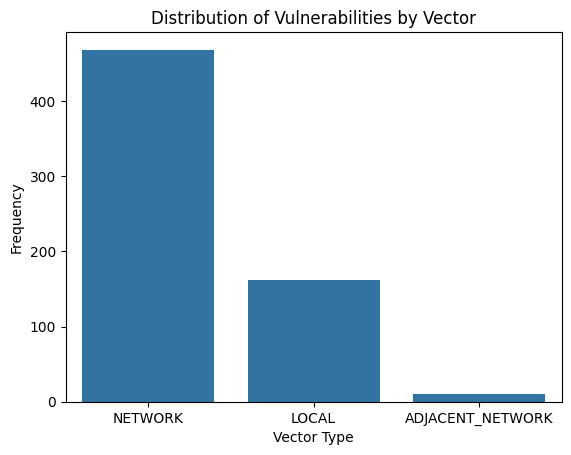

In [21]:
# Creating a plot to show the frequency of Attack vectors

# Count occurrences of each unique value in the 'vector' column
vector_counts = df_clean["vector"].value_counts()

# Plot count of vulnerabilities by vector type
sns.barplot(x=vector_counts.index, y=vector_counts.values)

# Labels and title
plt.xlabel("Vector Type")
plt.ylabel("Frequency")
plt.title("Distribution of Vulnerabilities by Vector")

# Show the plot
plt.show()

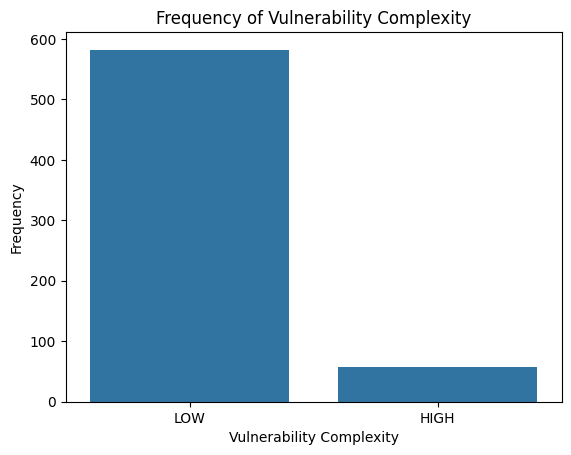

In [22]:
# Creating a plot to show the frequency of Complexities
sns.countplot(x="complexity", data=df_clean)
plt.xlabel("Vulnerability Complexity")
plt.ylabel("Frequency")
plt.title("Frequency of Vulnerability Complexity")
# Show the plot
plt.show()

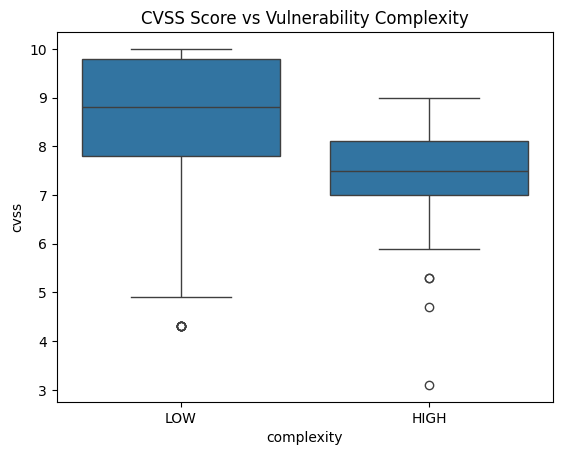

In [23]:
sns.boxplot(data=df_clean, x="complexity", y="cvss")
plt.title("CVSS Score vs Vulnerability Complexity")
plt.show()


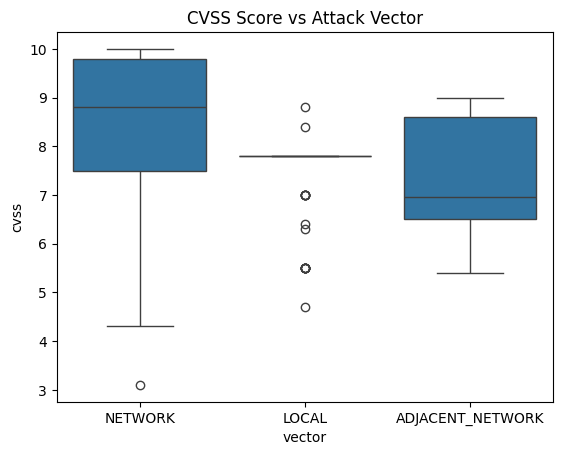

In [24]:
sns.boxplot(data=df_clean, x="vector", y="cvss")
plt.title("CVSS Score vs Attack Vector")
plt.show()

In [25]:
# Importing necessary sklearn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

### Performing Mapping to perform Data Visualisation

In [26]:
df_clean = df_clean.copy()[["product", "vector", "complexity", "cvss"]]

mapping = {"LOW": 1.0, "HIGH": 2.0}
df_clean["complexity"] = df_clean["complexity"].map(mapping)
# using map to change the complexities to numerical values 

In [27]:
def one_hot_encode_columns(df, columns=['vector', 'product']):

    encoded_cols = pd.get_dummies(df[columns], prefix=columns)    # Create one-hot encoded columns
    
    result_df = pd.concat([df, encoded_cols], axis=1)
    result_df = result_df.drop(columns=columns)
    
    return result_df

df_clean = one_hot_encode_columns(df_clean)

In [28]:
df_clean.head(5)
# Checking df_clean again before model training.

,complexity,cvss,vector_ADJACENT_NETWORK,vector_LOCAL,vector_NETWORK,product_ASP.NET AJAX,product_ASP.NET AJAX and Sitefinity,product_Access Management server,product_Acrobat and Reader,product_Active Directory,...,product_iOS and macOS,"product_iOS, macOS, and iPadOS",product_macOS,product_mongo-express,product_nsDocShell destructor,product_rConfig,product_vBulletin,product_vCenter Server,product_vCenter Server and Cloud Foundation,product_vRealize Operations Manager API
0,1.0,9.8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,7.8,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,9.8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,9.8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,8.8,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df_clean.isnull().sum()
# Checking again for null values.

complexity                                     0
cvss                                           0
vector_ADJACENT_NETWORK                        0
vector_LOCAL                                   0
vector_NETWORK                                 0
                                              ..
product_rConfig                                0
product_vBulletin                              0
product_vCenter Server                         0
product_vCenter Server and Cloud Foundation    0
product_vRealize Operations Manager API        0
Length: 312, dtype: int64

In [30]:
print(f"Correlation: {df_clean['cvss'].corr(df_clean['complexity'])}")
print(f"Covariance: {df_clean['cvss'].cov(df_clean['complexity'])}")

Correlation: -0.275429697573292
Covariance: -0.10327171361502346


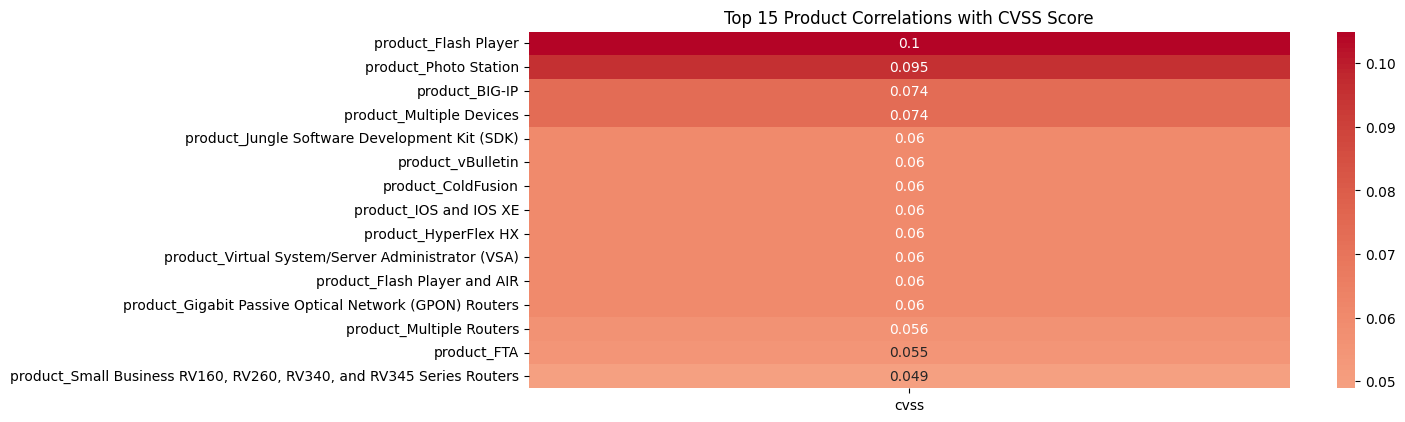

In [31]:
# Create a figure
plt.figure(figsize=(15, 12))

# Plot 1: Product correlations with CVSS (top 15)
plt.subplot(3, 1, 1)
product_cols = [col for col in df_clean.columns if 'product_' in col]
product_corr = df_clean[product_cols + ['cvss']].corr()['cvss'].sort_values(ascending=False)
product_corr = product_corr[1:16]  # Top 15 products, excluding cvss itself
sns.heatmap(pd.DataFrame(product_corr), annot=True, cmap='coolwarm', center=0)
plt.title('Top 15 Product Correlations with CVSS Score')

plt.tight_layout()
plt.show()

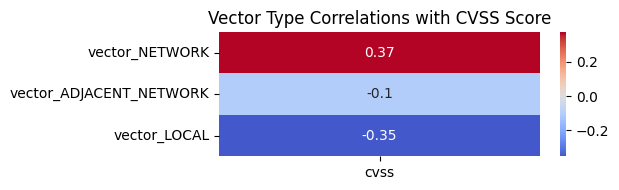

In [32]:
# Plot 2: Vector correlations with CVSS
plt.subplot(3, 1, 2)
vector_cols = [col for col in df_clean.columns if 'vector_' in col]
vector_corr = df_clean[vector_cols + ['cvss']].corr()['cvss'].sort_values(ascending=False)
vector_corr = vector_corr[1:]  # Excluding cvss itself
sns.heatmap(pd.DataFrame(vector_corr), annot=True, cmap='coolwarm', center=0)
plt.title('Vector Type Correlations with CVSS Score')

plt.tight_layout()
plt.show()

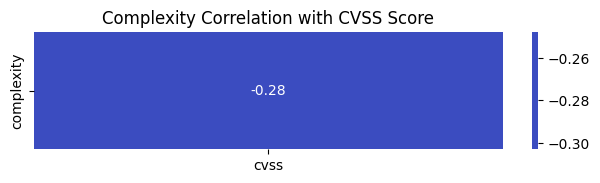

In [33]:
# Plot 3: Complexity correlation with CVSS
plt.subplot(3, 1, 3)
complexity_corr = df_clean[['complexity', 'cvss']].corr()['cvss']
complexity_corr = complexity_corr[:1]  # Excluding cvss itself
sns.heatmap(pd.DataFrame(complexity_corr), annot=True, cmap='coolwarm', center=0)
plt.title('Complexity Correlation with CVSS Score')

plt.tight_layout()
plt.show()

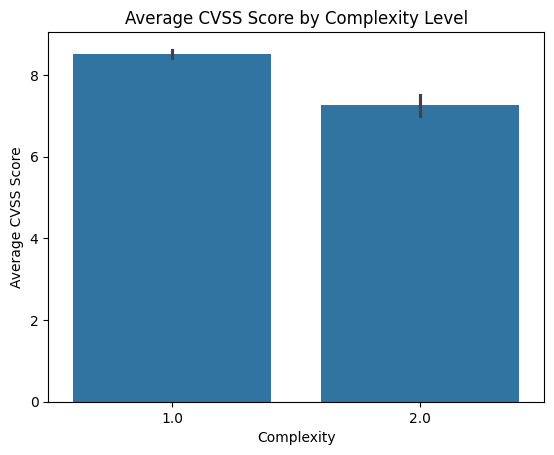

In [34]:
sns.barplot(x='complexity', y='cvss', data=df_clean)
plt.title('Average CVSS Score by Complexity Level')
plt.xlabel('Complexity')
plt.ylabel('Average CVSS Score')
plt.show()
# Where 1.0 is LOW and 2.0 is HIGH complexity
# Forming a plot to learn more about the current CVSS Scores
#this plot also shows the average minimum CVSS scores based on the complexity levels.

In [35]:
# Re-defining df_clean because the previous steps messed it up a little.
df_clean = df.copy()[['product','vector','cvss','complexity']]

mapping = {"LOW": 1.0, "HIGH": 2.0}
df_clean["complexity"] = df_clean["complexity"].map(mapping)

# For the remaining visualisations, we will be using a map to change the vectors to numerical values.
vector_mapping = {"LOCAL": 1, "NETWORK": 2, "ADJACENT_NETWORK": 3}
df_clean["vector"] = df_clean["vector"].map(vector_mapping)

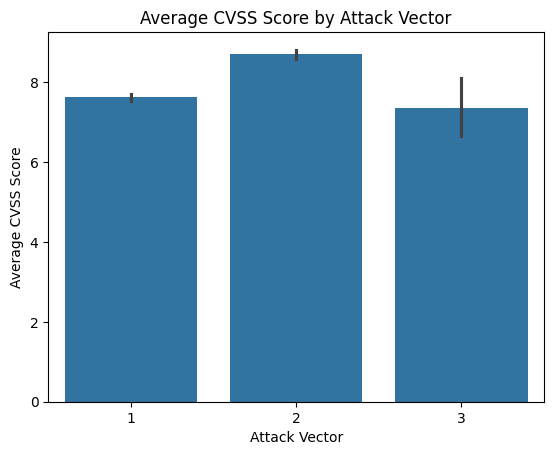

In [36]:
sns.barplot(x='vector', y='cvss', data=df_clean)
plt.title('Average CVSS Score by Attack Vector')
plt.xlabel('Attack Vector')
plt.ylabel('Average CVSS Score')
plt.show()

In [37]:
# Changing all Adjacent_Network attack vectors to Network
df_clean['vector'] = df_clean['vector'].replace('ADJACENT_NETWORK', 'NETWORK')


In [38]:
df_clean["vector"].value_counts()

vector
2    468
1    162
3     10
Name: count, dtype: int64

In [39]:
df_encoded = pd.get_dummies(df_clean, columns=["product", "vector", "complexity"], drop_first=True)

In [40]:
# creating the x and y variables based on our problem statement
X = df_encoded.drop(columns=["cvss"])
y = df_encoded["cvss"]

In [41]:
Q1 = df["cvss"].quantile(0.25)
Q3 = df["cvss"].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df["cvss"] < (Q1 - 1.5 * IQR)) | (df["cvss"] > (Q3 + 1.5 * IQR)))]

In [42]:
# Define KFold parameters
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
mae_lr_folds = []
mse_lr_folds = []
r2_lr_folds = []

mae_poly_folds = []
mse_poly_folds = []
r2_poly_folds = []

mae_ridge_folds = []
mse_ridge_folds = []
r2_ridge_folds = []

mae_lasso_folds = []
mse_lasso_folds = []
r2_lasso_folds = []

mae_knn_folds = []
mse_knn_folds = []
r2_knn_folds = []

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# checking datatypes of both x_train and y_train
X_train.dtypes
y_train.dtypes

dtype('float64')

In [45]:
# Robust Scaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Performing K-Folding & Machine Learning

In [46]:
# Performing our K-fold cross validation.
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f'Fold {fold+1}/{n_splits}')
    
    # Firstly, we split our data.
    X_train_fold = X.iloc[train_idx]
    X_val_fold = X.iloc[val_idx] 
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]
    
    # Our scale features (using RobustScaler as it gave us the best results.)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)
    
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train_fold)
    y_pred_lr = lr.predict(X_val_scaled)
    
    mae_lr_folds.append(mean_absolute_error(y_val_fold, y_pred_lr))
    mse_lr_folds.append(mean_squared_error(y_val_fold, y_pred_lr))
    r2_lr_folds.append(r2_score(y_val_fold, y_pred_lr))
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)
    
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train_fold)
    y_pred_poly = lr_poly.predict(X_val_poly)
    
    mae_poly_folds.append(mean_absolute_error(y_val_fold, y_pred_poly))
    mse_poly_folds.append(mean_squared_error(y_val_fold, y_pred_poly))
    r2_poly_folds.append(r2_score(y_val_fold, y_pred_poly))
    
    # Ridge Regression
    ridge = Ridge(alpha=10)
    ridge.fit(X_train_scaled, y_train_fold)
    y_pred_ridge = ridge.predict(X_val_scaled)
    
    mae_ridge_folds.append(mean_absolute_error(y_val_fold, y_pred_ridge))
    mse_ridge_folds.append(mean_squared_error(y_val_fold, y_pred_ridge))
    r2_ridge_folds.append(r2_score(y_val_fold, y_pred_ridge))
    
    # Lasso Regression
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train_scaled, y_train_fold)
    y_pred_lasso = lasso.predict(X_val_scaled)
    
    mae_lasso_folds.append(mean_absolute_error(y_val_fold, y_pred_lasso))
    mse_lasso_folds.append(mean_squared_error(y_val_fold, y_pred_lasso))
    r2_lasso_folds.append(r2_score(y_val_fold, y_pred_lasso))
    
    # KNN Regression
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_scaled, y_train_fold)
    y_pred_knn = knn.predict(X_val_scaled)
    
    mae_knn_folds.append(mean_absolute_error(y_val_fold, y_pred_knn))
    mse_knn_folds.append(mean_squared_error(y_val_fold, y_pred_knn))
    r2_knn_folds.append(r2_score(y_val_fold, y_pred_knn))

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


### One Hot Encoding

In [47]:
# Performing one-hot encoding
df_clean = df_clean.copy()  # Ensure no accidental modifications
df_clean = pd.get_dummies(df_clean, columns=['vector'], drop_first=True)  # One-hot encode 'vector'

In [48]:
# Define Features (X) and Target (y)
X = df_clean.drop(columns=['cvss', 'product'])
y = df_clean['cvss']  # Target variable

### Model Evaluation

In [49]:
knn = KNeighborsRegressor(n_neighbors=25)
# Using n = 25 as it is the closest value to square root 600.

In [50]:
knn.fit(X_train_scaled, y_train_fold)

KNeighborsRegressor(n_neighbors=25)

In [51]:
# KNN Predictions.
y_pred_knn

array([8.54, 9.4 , 7.68, 7.86, 9.6 , 7.4 , 8.66, 8.66, 6.88, 6.88, 7.54,
       9.6 , 9.6 , 9.6 , 8.94, 8.94, 8.68, 9.6 , 9.6 , 8.2 , 8.2 , 8.2 ,
       8.8 , 8.2 , 8.8 , 9.46, 9.46, 6.88, 7.34, 7.34, 7.34, 9.6 , 7.54,
       7.8 , 9.24, 7.34, 7.8 , 6.88, 6.88, 6.88, 7.34, 9.6 , 9.08, 9.6 ,
       7.84, 7.34, 9.6 , 9.6 , 9.6 , 9.6 , 6.88, 9.6 , 9.6 , 6.88, 9.6 ,
       9.6 , 9.6 , 9.6 , 6.88, 9.6 , 9.6 , 9.6 , 9.2 , 9.2 , 7.34, 9.6 ,
       9.6 , 7.98, 9.6 , 9.6 , 7.54, 7.54, 9.1 , 6.88, 8.92, 8.92, 8.92,
       8.92, 7.92, 8.22, 7.8 , 9.6 , 9.6 , 7.34, 9.6 , 9.4 , 9.6 , 9.2 ,
       9.24, 7.5 , 7.86, 9.6 , 8.44, 9.6 , 9.6 , 9.6 , 9.6 , 7.34, 6.66,
       7.86, 9.6 , 6.88, 9.6 , 9.6 , 9.6 , 8.2 , 8.2 , 8.2 , 7.52, 7.8 ,
       7.34, 7.34, 7.8 , 9.6 , 9.6 , 9.6 , 9.6 , 6.4 , 7.06, 6.66, 8.8 ,
       9.8 , 8.8 , 6.88, 9.8 , 8.8 , 7.54, 7.8 ])

In [52]:
# Print results
print("kNN Performance:")
print(f"MAE: {np.mean(mae_knn_folds)}, MSE: {np.mean(mse_knn_folds)}, R² (Accuracy): {np.mean(r2_knn_folds)}")

print("\nLinear Regression Performance:")
print(f"MAE: {np.mean(mae_lr_folds)}, MSE: {np.mean(mse_lr_folds)}, R² (Accuracy): {np.mean(r2_lr_folds)}")

print("\nPolynomial Regression Performance:")
print(f"MAE: {np.mean(mae_poly_folds)}, MSE: {np.mean(mse_poly_folds)}, R² (Accuracy): {np.mean(r2_poly_folds)}")

print("\nRidge Regression Performance:")
print(f"MAE: {np.mean(mae_ridge_folds)}, MSE: {np.mean(mse_ridge_folds)}, R² (Accuracy): {np.mean(r2_ridge_folds)}")

print("\nLasso Regression Performance:")
print(f"MAE: {np.mean(mae_lasso_folds)}, MSE: {np.mean(mse_lasso_folds)}, R² (Accuracy): {np.mean(r2_lasso_folds)}")

kNN Performance:
MAE: 0.7428437500000001, MSE: 1.3484068749999998, R² (Accuracy): 0.21629288861238716

Linear Regression Performance:
MAE: 0.7956580925575375, MSE: 1.7076849443638586, R² (Accuracy): -0.02389985968605297

Polynomial Regression Performance:
MAE: 0.7131665982810393, MSE: 1.5291352758766164, R² (Accuracy): 0.08374700217920276

Ridge Regression Performance:
MAE: 0.7667374254991304, MSE: 1.2632033948465284, R² (Accuracy): 0.2634846134881038

Lasso Regression Performance:
MAE: 0.917795679067748, MSE: 1.4997928409685126, R² (Accuracy): 0.11550652500719902


Based on these results, we will choose to use the prediction from our Ridge Regression model as our prediction value. It has, comparatively, the lower/lowest MAE/MSE value and the highest R² value compared to the other model's prediction values.

In [53]:
y_pred_knn = knn.predict(X_val_scaled)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_ridge.flatten()
})
print(results_df)

     Actual  Predicted
694     9.8   8.011373
276     9.8   8.863938
302     8.1   7.760523
750     8.8   7.732997
183     7.5   8.876726
..      ...        ...
483     9.8   7.589373
33      9.8   9.140518
739     9.8   8.830690
142     8.8   7.791335
507     9.8   7.856543

[128 rows x 2 columns]


### Data Visualisations (Actual vs Prediction)

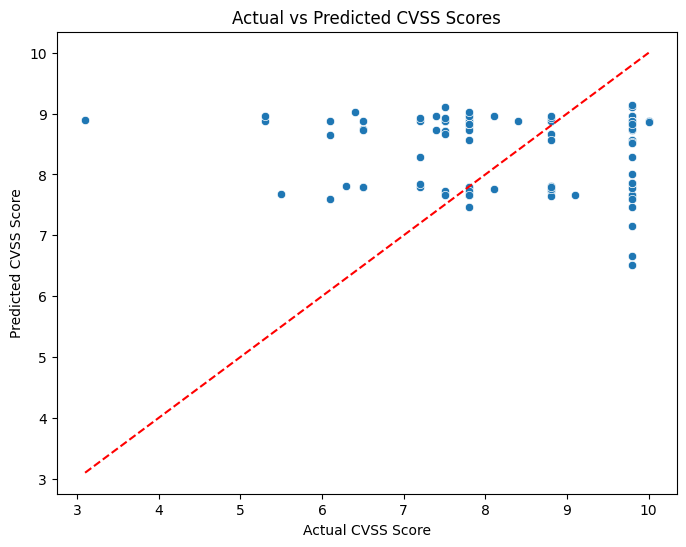

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.xlabel("Actual CVSS Score")
plt.ylabel("Predicted CVSS Score")
plt.title("Actual vs Predicted CVSS Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

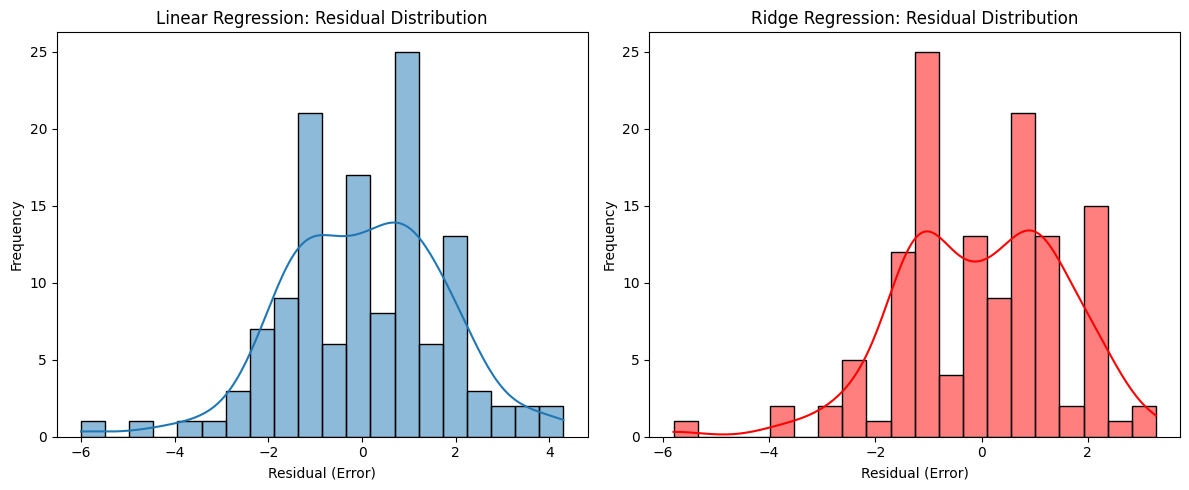

In [63]:
plt.figure(figsize=(12, 5))

# Residual plot for Linear Regression
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred_lr, bins=20, kde=True)
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Linear Regression: Residual Distribution")

# Residual plot for Ridge Regression
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_ridge, bins=20, kde=True, color="red")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title(f"Ridge Regression: Residual Distribution")

plt.tight_layout()
plt.show()